In [80]:
import pandas as pd
import geopandas as gpd
import importlib
import numpy as np
import matplotlib.pyplot as plt

from itertools import repeat

from diagnostic import analyses, report#, simulparser


In [81]:
# importlib.reload(latex_string)
importlib.reload(analyses)
importlib.reload(report)

<module 'diagnostic.report' from '/home/ebobrow/Github/simul_diagnostic/src/diagnostic/report.py'>

In [82]:
matsim_output_path = ''
loop_detector_counts = ''

In [83]:
if matsim_output_path and loop_detector_counts:
    simulated = simulparser.MATSimParser(matsim_output_path)
    observed = pd.read_csv(loop_detector_counts)
else:
    simulated = pd.DataFrame.from_dict({
        'link_id' : [i for i in range(0, 10)],
        'count' : [i for i in range(10, 101, 10)],
        'time' : [i for i in repeat(1, 10)],
        'type' : [i for i in repeat('entered_link', 10)]
    })
    observed = pd.DataFrame.from_dict({
        'link_id' : [i for i in range(0, 10)],
        'count' : [i for i in range(11, 102, 10)],
        'time' : [i for i in repeat(1, 10)],
        'type' : [i for i in repeat('entered_link', 10)]
    })
    # simulated = pd.read_csv('./test_data/simulated.csv')
    # observed = pd.read_csv('./test_data/observed.csv')

In [84]:
zurich_shp: gpd.GeoDataFrame = gpd.read_file("test_data/zurich_shp/geoz.sv_str_lin.shp")
zurich_shp.head()

,str_nr,str_name,str_st_bez,str_von,str_bis,str_kreis,str_planqu,str_vb,str_up_kan,snb_str_nr,snb_erlaeu,snb_tafelt,snb_tafe00,objectid,geometry
0,1771,Schoeckstrasse,gültig,Utoquai,Theaterstrasse 14,1,O 14,AA,2408,1771.0,Othmar Schoeck (1886-1957): Komponist und Musi...,NaN,NaN,5968.0,"LINESTRING (2683569.818 1246755.725, 2683586.3..."
1,53,Altweg,gültig,Letzigraben 231,In der Ey 60,9,J 13,AR,2406,53.0,Verkürzte Form des Flurnamens «im alten Weg» (...,NaN,NaN,5969.0,"LINESTRING (2679645.779 1247242.273, 2679618.3..."
2,223,Binderweg,gültig,Zelghalde 44,Hürststrasse 56,11,M 8,AF,2107,223.0,Gottfried Binder (1872-1934): Letzter Gemeinde...,NaN,NaN,5970.0,"LINESTRING (2682314.741 1252068.947, 2682312.7..."
3,1754,Schlatterweg,gültig,Schaffhauserstrasse 91,Im Birkenhof,6,N 10,UN,2207,1754.0,Leonhard Schlatter: Erster namentlich bekannte...,Leonhard Schlatter\r\nErster namentlich bekann...,NaN,5971.0,"LINESTRING (2683097.981 1249831.463, 2683059.2..."
4,2223,Wunderlistrasse,gültig,Lehenstrasse 43,Rebbergstrasse 1,10,L/M 10,WP,2207,2223.0,Paul Wunderli (1852-1885): Kaufmann von Meilen...,Paul Wunderli (1852-1885)\r\nEigentümer des Wa...,NaN,5972.0,"LINESTRING (2681928.804 1250113.515, 2681929.5..."


In [85]:
zurich_shp = zurich_shp[["str_nr", "geometry"]]#[zurich_shp["str_nr"] < 100]
zurich_shp.head()

,str_nr,geometry
0,1771,"LINESTRING (2683569.818 1246755.725, 2683586.3..."
1,53,"LINESTRING (2679645.779 1247242.273, 2679618.3..."
2,223,"LINESTRING (2682314.741 1252068.947, 2682312.7..."
3,1754,"LINESTRING (2683097.981 1249831.463, 2683059.2..."
4,2223,"LINESTRING (2681928.804 1250113.515, 2681929.5..."


In [86]:
zurich_shp.rename(columns={"str_nr" : "link_id"}, inplace=True)
zurich_shp["count"] = np.arange(len(zurich_shp))
zurich_shp.sort_values(by="link_id", axis=0)
zurich_shp['time'] = 1
zurich_shp['type'] = 'entered_link'
zurich_shp

,link_id,geometry,count,time,type
0,1771,"LINESTRING (2683569.818 1246755.725, 2683586.3...",0,1,entered_link
1,53,"LINESTRING (2679645.779 1247242.273, 2679618.3...",1,1,entered_link
2,223,"LINESTRING (2682314.741 1252068.947, 2682312.7...",2,1,entered_link
3,1754,"LINESTRING (2683097.981 1249831.463, 2683059.2...",3,1,entered_link
4,2223,"LINESTRING (2681928.804 1250113.515, 2681929.5...",4,1,entered_link
...,...,...,...,...,...
2519,801,"LINESTRING (2686576.606 1248037.418, 2686577.6...",2519,1,entered_link
2520,1593,"LINESTRING (2682425.316 1243795.915, 2682426.6...",2520,1,entered_link
2521,414,"LINESTRING (2683731.900 1246560.888, 2683759.8...",2521,1,entered_link
2522,2185,"LINESTRING (2683195.824 1247411.220, 2683157.5...",2522,1,entered_link


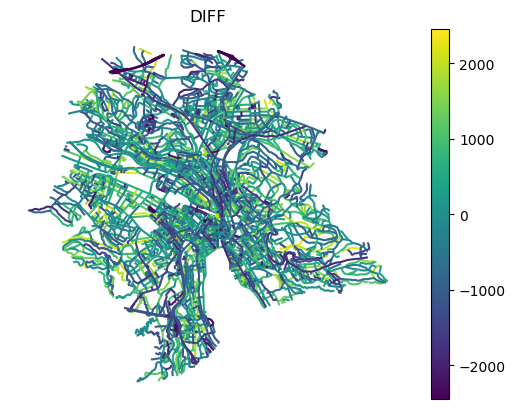

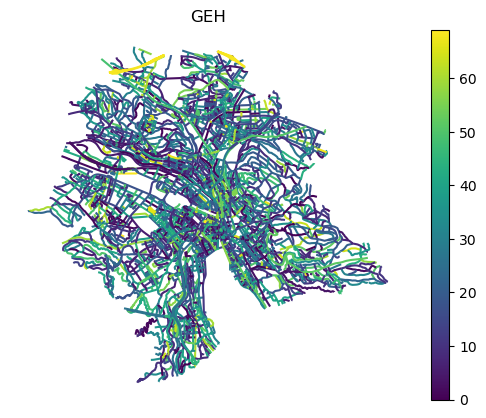

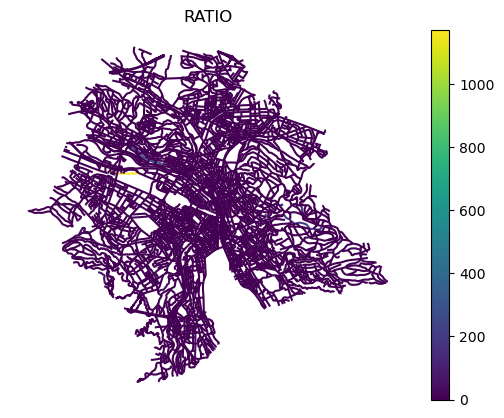

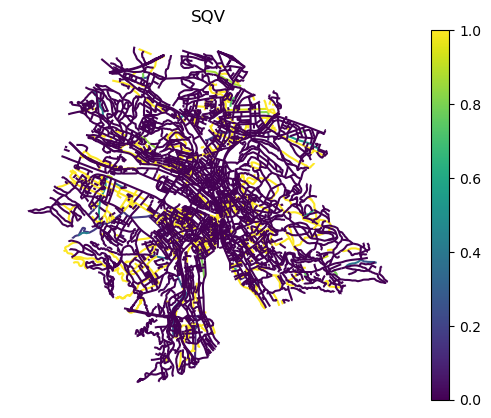

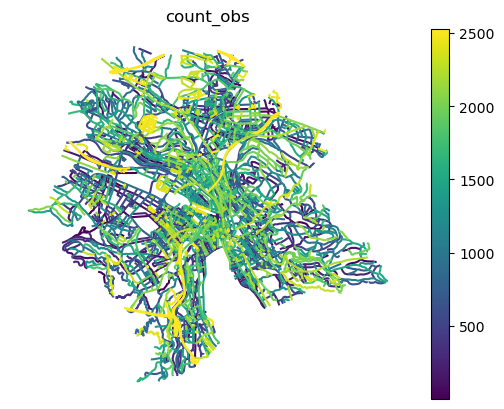

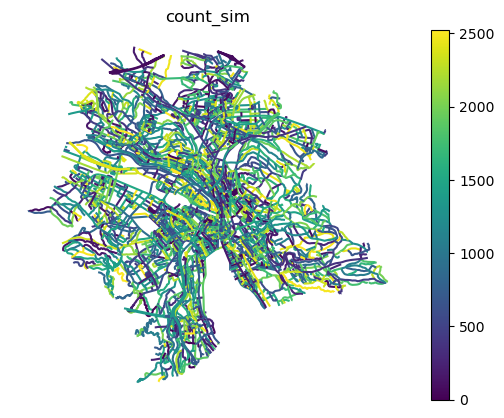

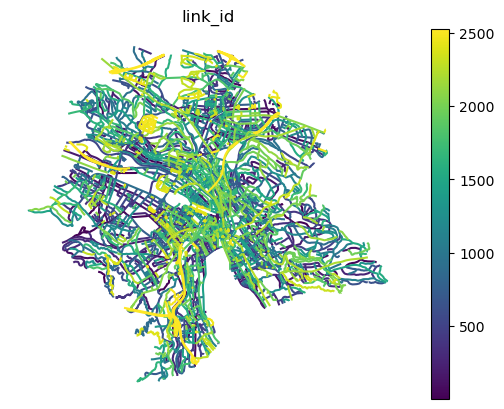

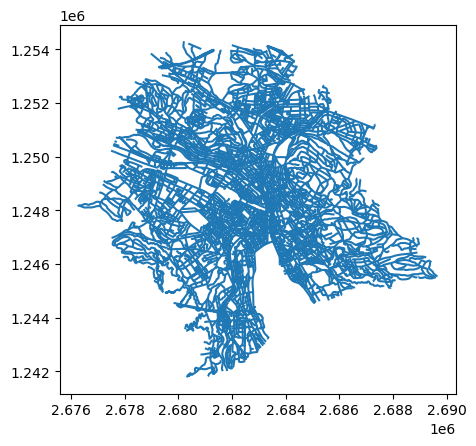

In [87]:
plt.ion()
gpd.GeoDataFrame(zurich_shp[['geometry', 'link_id']]).plot()
plt.ioff()

In [88]:
observed = pd.DataFrame({"count" : list(range(2, len(zurich_shp)+1)),
"link_id" : list(range(1,len(zurich_shp)))})
observed['time'] = 1
observed['type'] = 'entered_link'

In [89]:
SQV10 = analyses.FilterByLargest(rules=(10, ["SQV"]))
EMD30 = analyses.FilterByLargest(rules=(10, ["EMD30"]))
links = analyses.FilterByValue(rules={'link_id': [1, 2, 3], 'SQV': [1, 0]})

cc = analyses.CountComparison()
cs = analyses.CountSummaryStats()
cv = analyses.CountVisualization()
em = analyses.EarthMoverDistance(EMD30)
analyses_list = [cc, cs, cv, em]

add = {
    cs : cc,
    cv : cc
}

INFO:root:<class 'diagnostic.analyses.CountComparison'>
INFO:root:<enum 'CountComparisonOptions'>
INFO:root:<class 'diagnostic.analyses.CountSummaryStats'>
INFO:root:<enum 'CountSummaryStatsOptions'>
INFO:root:<class 'diagnostic.analyses.CountVisualization'>
INFO:root:<enum 'CountComparisonOptions'>
INFO:root:<class 'diagnostic.analyses.EarthMoverDistance'>
INFO:root:<enum 'EMDOptions'>


In [90]:
observed

,count,link_id,time,type
0,2,1,1,entered_link
1,3,2,1,entered_link
2,4,3,1,entered_link
3,5,4,1,entered_link
4,6,5,1,entered_link
...,...,...,...,...
2518,2520,2519,1,entered_link
2519,2521,2520,1,entered_link
2520,2522,2521,1,entered_link
2521,2523,2522,1,entered_link


In [91]:
zurich_shp

,link_id,geometry,count,time,type
0,1771,"LINESTRING (2683569.818 1246755.725, 2683586.3...",0,1,entered_link
1,53,"LINESTRING (2679645.779 1247242.273, 2679618.3...",1,1,entered_link
2,223,"LINESTRING (2682314.741 1252068.947, 2682312.7...",2,1,entered_link
3,1754,"LINESTRING (2683097.981 1249831.463, 2683059.2...",3,1,entered_link
4,2223,"LINESTRING (2681928.804 1250113.515, 2681929.5...",4,1,entered_link
...,...,...,...,...,...
2519,801,"LINESTRING (2686576.606 1248037.418, 2686577.6...",2519,1,entered_link
2520,1593,"LINESTRING (2682425.316 1243795.915, 2682426.6...",2520,1,entered_link
2521,414,"LINESTRING (2683731.900 1246560.888, 2683759.8...",2521,1,entered_link
2522,2185,"LINESTRING (2683195.824 1247411.220, 2683157.5...",2522,1,entered_link


In [92]:
link_count_report = report.Report('Link count report', zurich_shp, observed, analyses_list, analysis_dependence_dict=add)

/home/ebobrow/anaconda3/envs/simul/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


Analysis:<diagnostic.analyses.CountComparison object at 0x7fbae1313b90>
Analysis:<diagnostic.analyses.CountSummaryStats object at 0x7fbadb459910>
Analysis:<diagnostic.analyses.CountVisualization object at 0x7fbadb42fbd0>
DIFF
GEH
RATIO
SQV
count_obs
count_sim
link_id
Analysis:<diagnostic.analyses.EarthMoverDistance object at 0x7fbadb1ebb90>


In [93]:
# link_count_report.to_latex('latex_output/test', latex_dir=PurePath(Path.cwd(), 'latex_output'))
link_count_report.to_latex('latex_output/test')

Escape chars: ['_']
Escape chars: ['_']
Paths: [PurePosixPath('/tmp/tmpel8r8vh4/DIFF.pdf'), PurePosixPath('/tmp/tmpel8r8vh4/GEH.pdf'), PurePosixPath('/tmp/tmpel8r8vh4/RATIO.pdf'), PurePosixPath('/tmp/tmpel8r8vh4/SQV.pdf'), PurePosixPath('/tmp/tmpel8r8vh4/count_obs.pdf'), PurePosixPath('/tmp/tmpel8r8vh4/count_sim.pdf'), PurePosixPath('/tmp/tmpel8r8vh4/link_id.pdf')]
Data: [Figure([NoEscape(\centering), StandAloneGraphic(Arguments(NoEscape(/tmp/tmpel8r8vh4/DIFF.pdf)), Options('width=\\textwidth'), None)]), Figure([NoEscape(\centering), StandAloneGraphic(Arguments(NoEscape(/tmp/tmpel8r8vh4/GEH.pdf)), Options('width=\\textwidth'), None)]), Figure([NoEscape(\centering), StandAloneGraphic(Arguments(NoEscape(/tmp/tmpel8r8vh4/RATIO.pdf)), Options('width=\\textwidth'), None)]), Figure([NoEscape(\centering), StandAloneGraphic(Arguments(NoEscape(/tmp/tmpel8r8vh4/SQV.pdf)), Options('width=\\textwidth'), None)]), Figure([NoEscape(\centering), StandAloneGraphic(Arguments(NoEscape(/tmp/tmpel8r8vh4/co

In [94]:
cc.result.to_file('comparison.shp')

# Earth mover's distance test

In [95]:
sim = pd.read_csv('./test_data/test.csv')
sim['count'] = 1

obs = sim.copy()
obs = pd.concat([obs, obs])
sim

,time,type,link_id,vehicle,count
0,1.0,left link,890140,201740008398585,1
1,1.0,entered link,894435,201740008398585,1
2,1.0,left link,282946,201740012297026,1
3,1.0,entered link,282947,201740012297026,1
4,1.0,left link,493161,201740008136292,1
...,...,...,...,...,...
841,226.0,left link,1024369,201740010451177,1
842,226.0,entered link,237259,201740012297026,1
843,226.0,entered link,609172,201740010451177,1
844,227.0,left link,72608,201740007977263,1


In [96]:
report.CreateComparisonDF.emd(sim, obs)

,link_id,time,count_sim,count_obs
0,595,182.0,1,2
1,595,201.0,1,2
2,13585,109.0,1,2
3,13585,118.0,1,2
4,13587,97.0,1,2
...,...,...,...,...
841,1062326,133.0,1,2
842,1062326,139.0,1,2
843,1074723,212.0,1,2
844,1074725,201.0,1,2


In [97]:
fil = analyses.FilterByValue(rules={'link_id': [595, 2, 3], 'EMD30': [0]})
emd = analyses.EarthMoverDistance(fil)
emd.generate_analysis(report.CreateComparisonDF.emd(sim, obs))

INFO:root:<class 'diagnostic.analyses.EarthMoverDistance'>
INFO:root:<enum 'EMDOptions'>


In [98]:
emd.result

,link_id,EMD15,EMD30,EMD60
0,595,0.0,0.0,0.0


# Parser test

In [99]:
events = pd.read_csv('test_data/test.csv')
events

,time,type,link_id,vehicle
0,1.0,left link,890140,201740008398585
1,1.0,entered link,894435,201740008398585
2,1.0,left link,282946,201740012297026
3,1.0,entered link,282947,201740012297026
4,1.0,left link,493161,201740008136292
...,...,...,...,...
841,226.0,left link,1024369,201740010451177
842,226.0,entered link,237259,201740012297026
843,226.0,entered link,609172,201740010451177
844,227.0,left link,72608,201740007977263
